# Flight Prediction EDA and Feature engineering

In [1]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df=pd.read_excel('Data_Train.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
test_df=pd.read_excel('Test_set.xlsx')
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [6]:
test_df.shape

(2671, 10)

In [7]:
train_df.shape

(10683, 11)

In [8]:
final_df=train_df.append(test_df)
final_df.head()

C:\Users\rames\AppData\Local\Temp\ipykernel_21236\2632932177.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=train_df.append(test_df)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


# Featuring Engineering    

In [9]:
#Spliting Date_of_journey
final_df['Day']=final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month']=final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Year']=final_df['Date_of_Journey'].str.split('/').str[2]
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [10]:
#Drop the Date_of_journey
final_df.drop('Date_of_Journey',axis=1,inplace=True)

In [11]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [12]:
#spliting the Dep_Time
final_df['Dep_hour']=final_df['Dep_Time'].apply(lambda x:x.split(':')[0])
final_df['Dep_min']=final_df['Dep_Time'].apply(lambda x:x.split(':')[1])

In [13]:
#convertion of Day,Month,Year and Dep_hour,Dep_min to INTEGER
final_df['Day']=final_df['Day'].astype('int64')
final_df['Month']=final_df['Month'].astype('int64')
final_df['Year']=final_df['Year'].astype('int64')
final_df['Dep_hour']=final_df['Dep_hour'].astype('int64')
final_df['Dep_min']=final_df['Dep_min'].astype('int64')

In [14]:
#Droping Dep_time
final_df.drop('Dep_Time',axis=1,inplace=True)

In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Arrival_Time     13354 non-null  object 
 5   Duration         13354 non-null  object 
 6   Total_Stops      13353 non-null  object 
 7   Additional_Info  13354 non-null  object 
 8   Price            10683 non-null  float64
 9   Day              13354 non-null  int64  
 10  Month            13354 non-null  int64  
 11  Year             13354 non-null  int64  
 12  Dep_hour         13354 non-null  int64  
 13  Dep_min          13354 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 1.5+ MB


In [16]:
final_df['Arrival_Time'].str[3:5]

0       10
1       15
2       25
3       30
4       35
        ..
2666    25
2667    55
2668    25
2669    15
2670    15
Name: Arrival_Time, Length: 13354, dtype: object

In [17]:
# spliting arrival time
final_df['Arrival_hour']=final_df['Arrival_Time'].str[0:2]
final_df['Arrival_min']=final_df['Arrival_Time'].str[3:5]

In [18]:
final_df['Arrival_hour']=final_df['Arrival_hour'].astype('int64')
final_df['Arrival_min']=final_df['Arrival_min'].astype('int64')

In [19]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Arrival_Time     13354 non-null  object 
 5   Duration         13354 non-null  object 
 6   Total_Stops      13353 non-null  object 
 7   Additional_Info  13354 non-null  object 
 8   Price            10683 non-null  float64
 9   Day              13354 non-null  int64  
 10  Month            13354 non-null  int64  
 11  Year             13354 non-null  int64  
 12  Dep_hour         13354 non-null  int64  
 13  Dep_min          13354 non-null  int64  
 14  Arrival_hour     13354 non-null  int64  
 15  Arrival_min      13354 non-null  int64  
dtypes: float64(1), int64(7), object(8)
memory usage: 1.7+ MB


In [20]:
#Droping Arrival_Time
final_df.drop('Arrival_Time',axis=1,inplace=True)

In [21]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Day              13354 non-null  int64  
 9   Month            13354 non-null  int64  
 10  Year             13354 non-null  int64  
 11  Dep_hour         13354 non-null  int64  
 12  Dep_min          13354 non-null  int64  
 13  Arrival_hour     13354 non-null  int64  
 14  Arrival_min      13354 non-null  int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 1.6+ MB


In [22]:
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [23]:
final_df['Total_Stops']=final_df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, 'nan':1, '4 stops':4})

In [24]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218.0,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302.0,1,3,2019,16,50,21,35


In [25]:
final_df[final_df['Total_Stops'].isnull()]
# final_df['Total_Stops'].isnull().sum()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,9,45,9,25


In [26]:
final_df['Total_Stops'].fillna(1,inplace=True)
# final_df['Total_Stops'].isnull().sum()

In [27]:
final_df['Total_Stops'].isnull().sum()

0

In [28]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13354 non-null  float64
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Day              13354 non-null  int64  
 9   Month            13354 non-null  int64  
 10  Year             13354 non-null  int64  
 11  Dep_hour         13354 non-null  int64  
 12  Dep_min          13354 non-null  int64  
 13  Arrival_hour     13354 non-null  int64  
 14  Arrival_min      13354 non-null  int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 1.6+ MB


In [29]:
final_df['Duration'].str[0].astype('int64')*60

0       120
1       420
2        60
3       300
4       240
       ... 
2666    120
2667    120
2668    360
2669     60
2670     60
Name: Duration, Length: 13354, dtype: int64

In [30]:
final_df['Duration_hour']=final_df['Duration'].str[0].astype('int64')*60

In [31]:
final_df['Duration_min']=final_df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [32]:
final_df[final_df['Duration']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2.0,No info,17327.0,6,3,2019,16,50,16,55,300,NaN
2660,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2.0,No info,NaN,12,3,2019,16,50,16,55,300,NaN


In [33]:
final_df.drop(6474,axis=0,inplace=True)

In [34]:
final_df.drop(2660,axis=0,inplace=True)

In [35]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,22,20,1,10,120,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,5,50,13,15,420,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,9,25,4,25,60,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218.0,12,5,2019,18,5,23,30,300,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302.0,1,3,2019,16,50,21,35,240,45


In [36]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Route            13350 non-null  object 
 4   Duration         13351 non-null  object 
 5   Total_Stops      13351 non-null  float64
 6   Additional_Info  13351 non-null  object 
 7   Price            10681 non-null  float64
 8   Day              13351 non-null  int64  
 9   Month            13351 non-null  int64  
 10  Year             13351 non-null  int64  
 11  Dep_hour         13351 non-null  int64  
 12  Dep_min          13351 non-null  int64  
 13  Arrival_hour     13351 non-null  int64  
 14  Arrival_min      13351 non-null  int64  
 15  Duration_hour    13351 non-null  int64  
 16  Duration_min     12068 non-null  object 
dtypes: float64(2)

In [37]:
final_df['Duration_min']=final_df['Duration_min'].astype('float64')

In [38]:
final_df['Duration_min'].isnull().sum()

1283

In [39]:
final_df['Duration_min'].fillna(0.0,inplace=True)

In [40]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Route            13350 non-null  object 
 4   Duration         13351 non-null  object 
 5   Total_Stops      13351 non-null  float64
 6   Additional_Info  13351 non-null  object 
 7   Price            10681 non-null  float64
 8   Day              13351 non-null  int64  
 9   Month            13351 non-null  int64  
 10  Year             13351 non-null  int64  
 11  Dep_hour         13351 non-null  int64  
 12  Dep_min          13351 non-null  int64  
 13  Arrival_hour     13351 non-null  int64  
 14  Arrival_min      13351 non-null  int64  
 15  Duration_hour    13351 non-null  int64  
 16  Duration_min     13351 non-null  float64
dtypes: float64(3)

In [41]:
final_df['Duration_IN_MIN']=final_df['Duration_hour']+final_df['Duration_min']

In [42]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Duration_IN_MIN
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,22,20,1,10,120,50.0,170.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,5,50,13,15,420,25.0,445.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,9,25,4,25,60,0.0,60.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218.0,12,5,2019,18,5,23,30,300,25.0,325.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302.0,1,3,2019,16,50,21,35,240,45.0,285.0


In [43]:
#Droping Duration,Duration_hour,Duration_min
final_df.drop('Duration_hour',axis=1,inplace=True)
final_df.drop('Duration_min',axis=1,inplace=True)
final_df.drop('Duration',axis=1,inplace=True)

In [44]:
final_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_IN_MIN
0,IndiGo,Banglore,New Delhi,BLR → DEL,0.0,No info,3897.0,24,3,2019,22,20,1,10,170.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2.0,No info,7662.0,1,5,2019,5,50,13,15,445.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2.0,No info,13882.0,9,6,2019,9,25,4,25,60.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1.0,No info,6218.0,12,5,2019,18,5,23,30,325.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1.0,No info,13302.0,1,3,2019,16,50,21,35,285.0


In [45]:
final_df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Total_Stops           0
Additional_Info       0
Price              2670
Day                   0
Month                 0
Year                  0
Dep_hour              0
Dep_min               0
Arrival_hour          0
Arrival_min           0
Duration_IN_MIN       0
dtype: int64

In [46]:
#Droping Route which is not so important
final_df.drop('Route',axis=1,inplace=True)

In [47]:
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_IN_MIN
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24,3,2019,22,20,1,10,170.0
1,Air India,Kolkata,Banglore,2.0,No info,7662.0,1,5,2019,5,50,13,15,445.0
2,Jet Airways,Delhi,Cochin,2.0,No info,13882.0,9,6,2019,9,25,4,25,60.0
3,IndiGo,Kolkata,Banglore,1.0,No info,6218.0,12,5,2019,18,5,23,30,325.0
4,IndiGo,Banglore,New Delhi,1.0,No info,13302.0,1,3,2019,16,50,21,35,285.0


In [48]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Total_Stops      13351 non-null  float64
 4   Additional_Info  13351 non-null  object 
 5   Price            10681 non-null  float64
 6   Day              13351 non-null  int64  
 7   Month            13351 non-null  int64  
 8   Year             13351 non-null  int64  
 9   Dep_hour         13351 non-null  int64  
 10  Dep_min          13351 non-null  int64  
 11  Arrival_hour     13351 non-null  int64  
 12  Arrival_min      13351 non-null  int64  
 13  Duration_IN_MIN  13351 non-null  float64
dtypes: float64(3), int64(7), object(4)
memory usage: 1.5+ MB


In [49]:
final_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [50]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
final_df['Additional_Info']= label_encoder.fit_transform(final_df['Additional_Info'])
  
# df['Additional_Info'].unique()

In [51]:
final_df['Additional_Info'].unique()

array([8, 5, 7, 1, 6, 0, 4, 3, 9, 2])

In [52]:
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [53]:
plane_names=final_df['Airline'].value_counts().index
plane_names

Index(['Jet Airways', 'IndiGo', 'Air India', 'Multiple carriers', 'SpiceJet',
       'Vistara', 'Air Asia', 'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business', 'Vistara Premium economy', 'Trujet'],
      dtype='object')

In [54]:
plane_counts=final_df['Airline'].value_counts().values
plane_counts

array([4745, 2564, 2190, 1543, 1026,  608,  405,  240,   16,    8,    5,
          1], dtype=int64)

In [55]:
final_df.isnull().sum()

Airline               0
Source                0
Destination           0
Total_Stops           0
Additional_Info       0
Price              2670
Day                   0
Month                 0
Year                  0
Dep_hour              0
Dep_min               0
Arrival_hour          0
Arrival_min           0
Duration_IN_MIN       0
dtype: int64

In [56]:
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_IN_MIN
0,IndiGo,Banglore,New Delhi,0.0,8,3897.0,24,3,2019,22,20,1,10,170.0
1,Air India,Kolkata,Banglore,2.0,8,7662.0,1,5,2019,5,50,13,15,445.0
2,Jet Airways,Delhi,Cochin,2.0,8,13882.0,9,6,2019,9,25,4,25,60.0
3,IndiGo,Kolkata,Banglore,1.0,8,6218.0,12,5,2019,18,5,23,30,325.0
4,IndiGo,Banglore,New Delhi,1.0,8,13302.0,1,3,2019,16,50,21,35,285.0


In [57]:
final_df['Airline']=label_encoder.fit_transform(final_df['Airline'])
final_df['Source']=label_encoder.fit_transform(final_df['Source'])
final_df['Destination']=label_encoder.fit_transform(final_df['Destination'])

In [58]:
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_IN_MIN
0,3,0,5,0.0,8,3897.0,24,3,2019,22,20,1,10,170.0
1,1,3,0,2.0,8,7662.0,1,5,2019,5,50,13,15,445.0
2,4,2,1,2.0,8,13882.0,9,6,2019,9,25,4,25,60.0
3,3,3,0,1.0,8,6218.0,12,5,2019,18,5,23,30,325.0
4,3,0,5,1.0,8,13302.0,1,3,2019,16,50,21,35,285.0


# Visualization

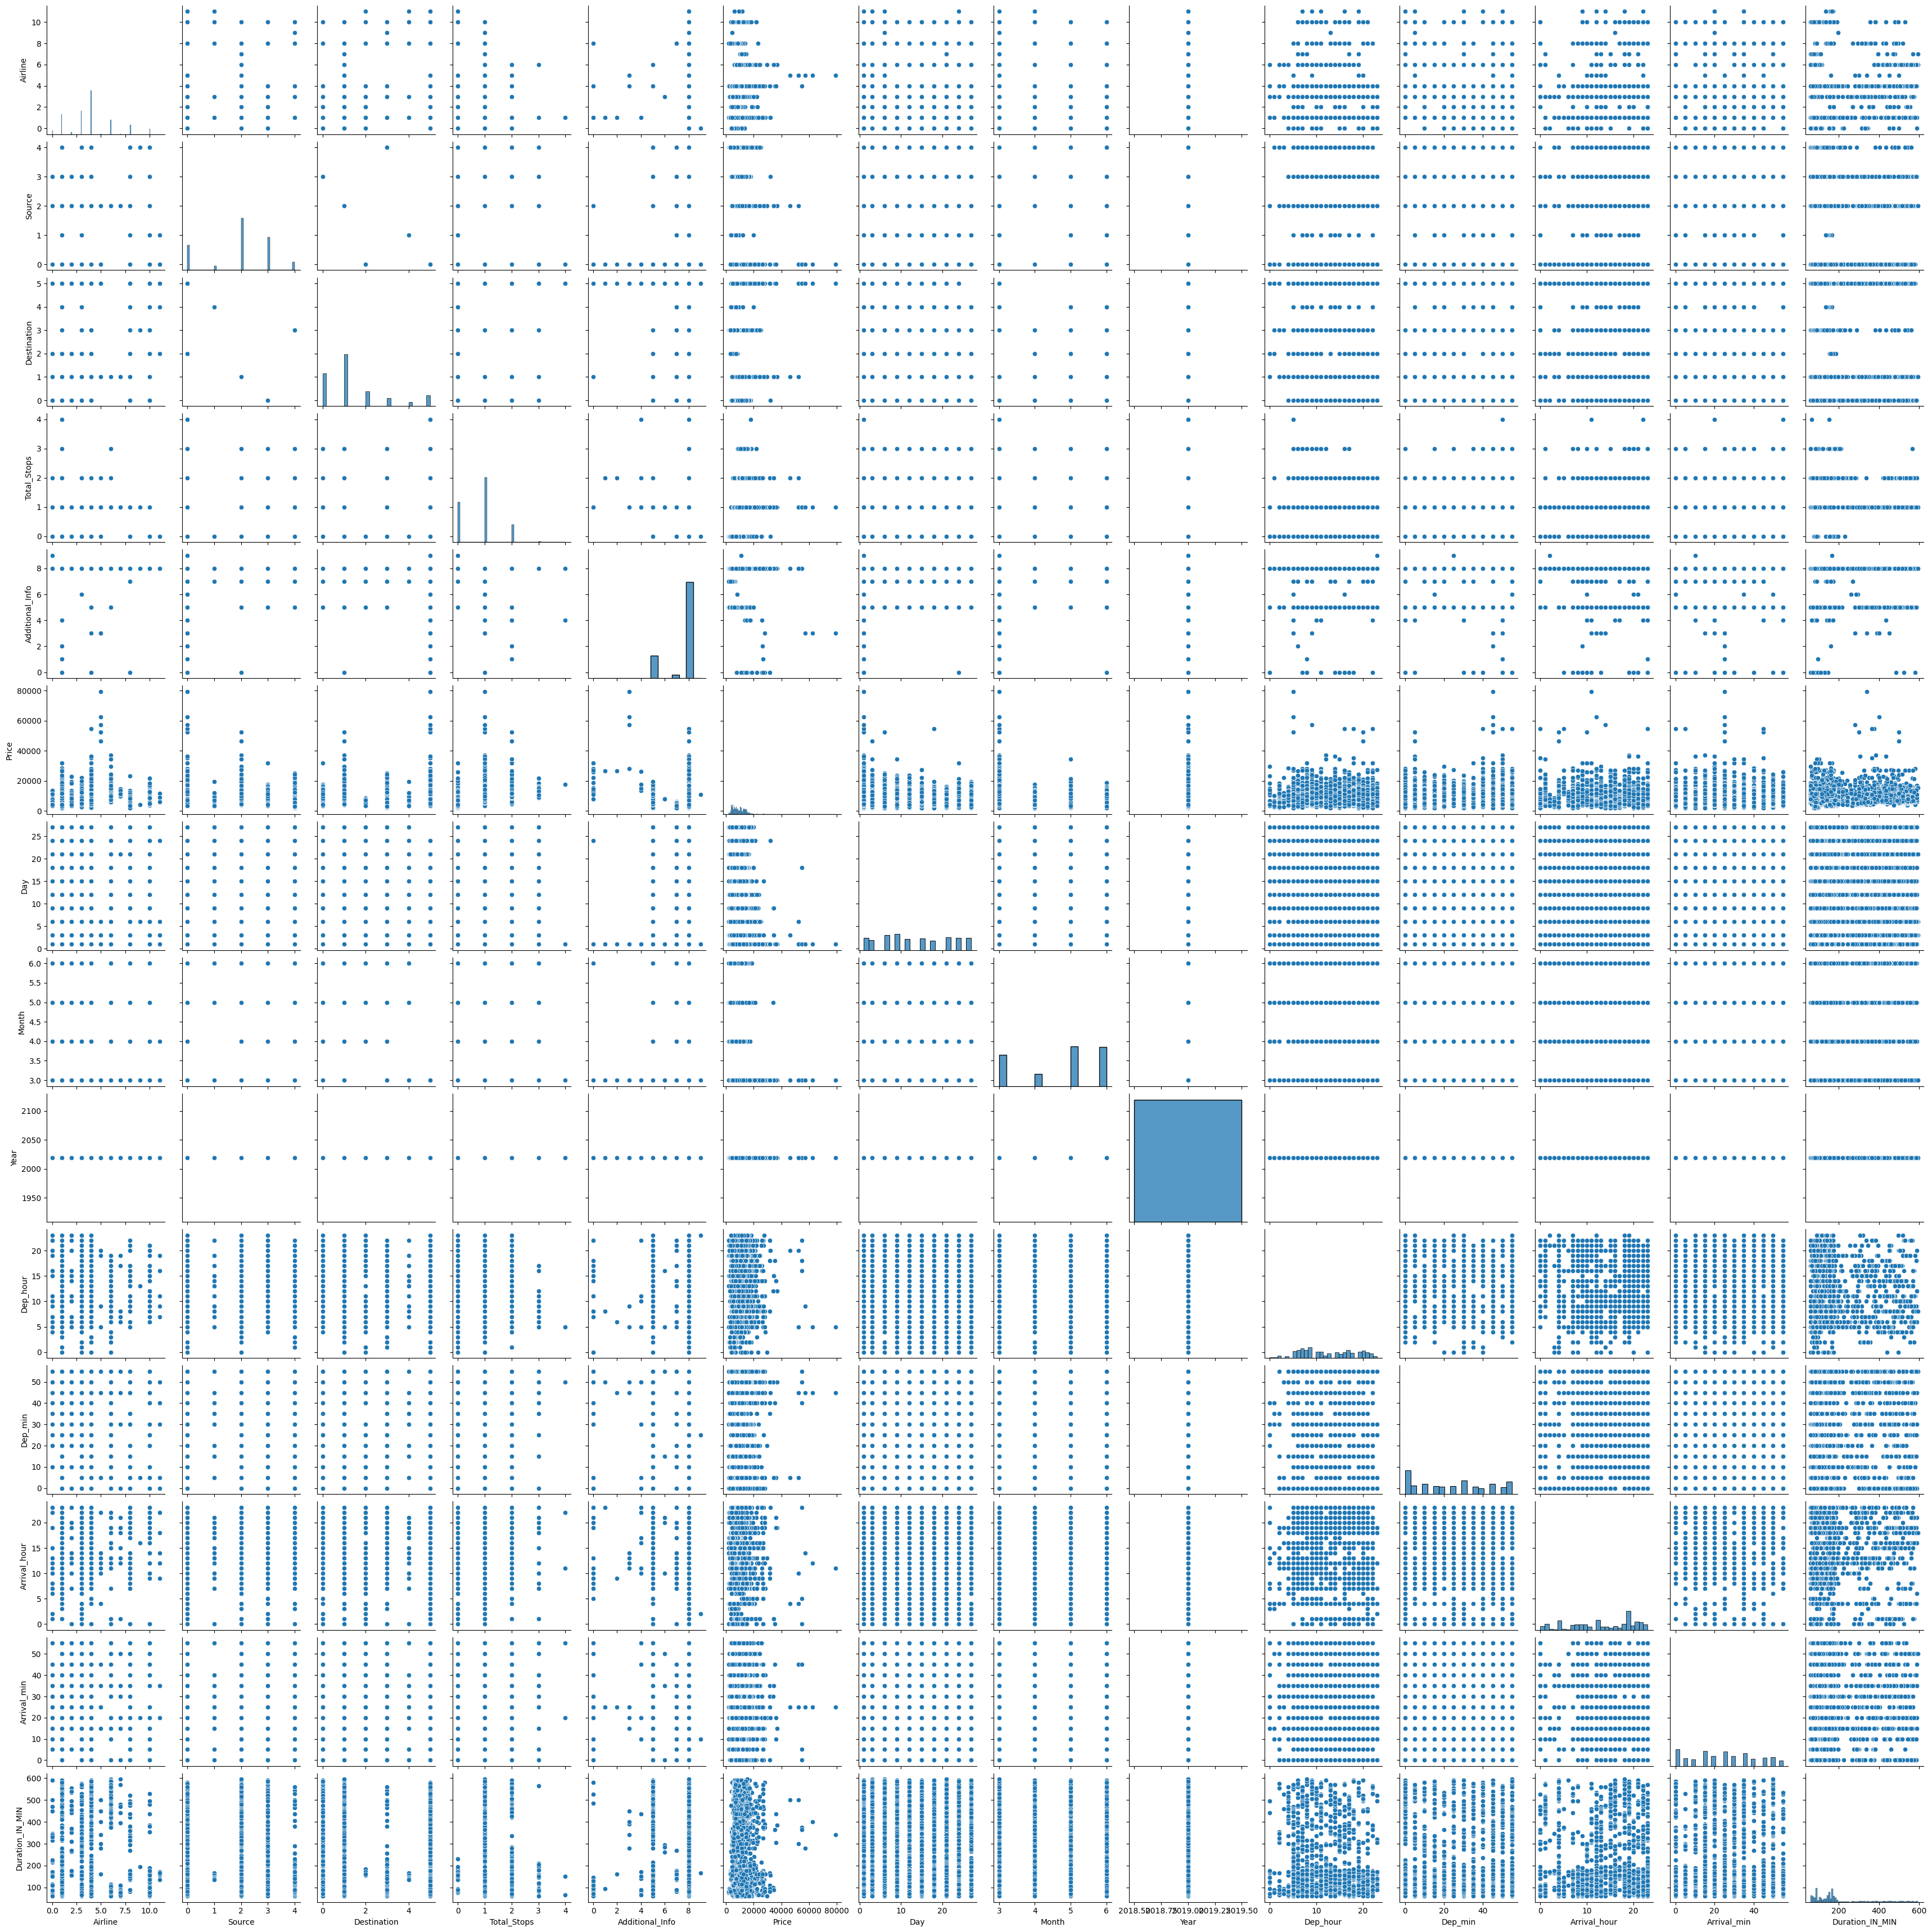

In [59]:
sns.pairplot(final_df)

<AxesSubplot: xlabel='Airline', ylabel='count'>

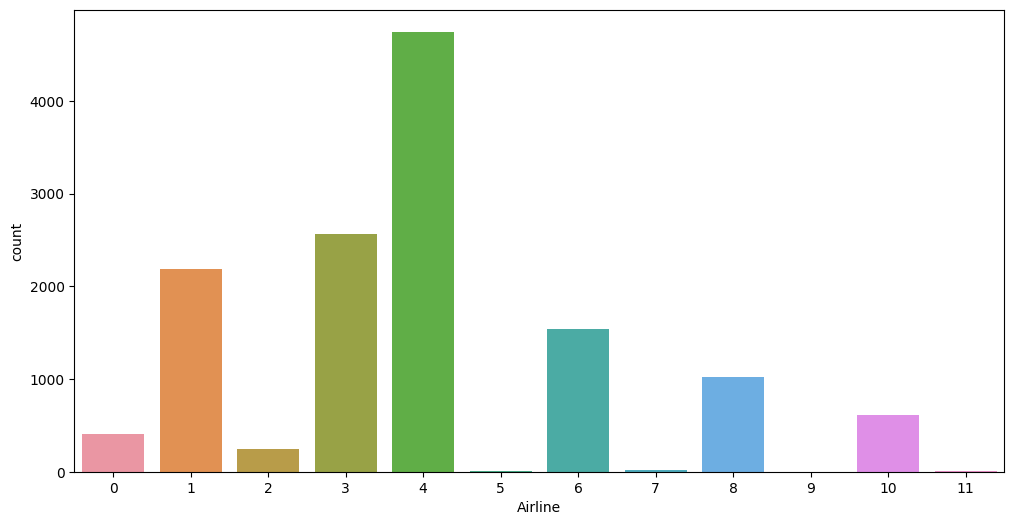

In [60]:
#Count plot for planes
plt.rcParams['figure.figsize']=(12,6)
sns.countplot(x=final_df['Airline'])

<AxesSubplot: >

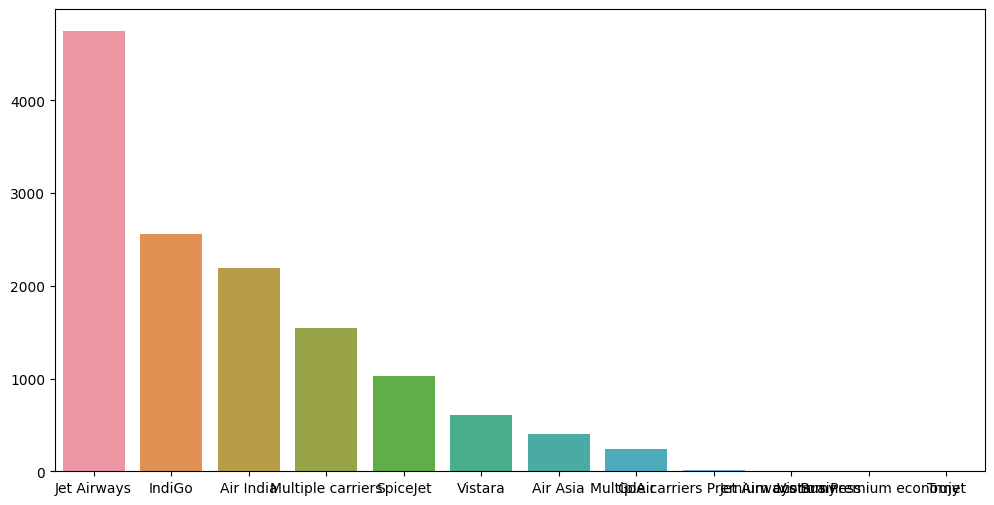

In [61]:
sns.barplot(x=plane_names,y=plane_counts,data=final_df)

D:\Anaconda\Anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<AxesSubplot: xlabel='Airline', ylabel='Price'>

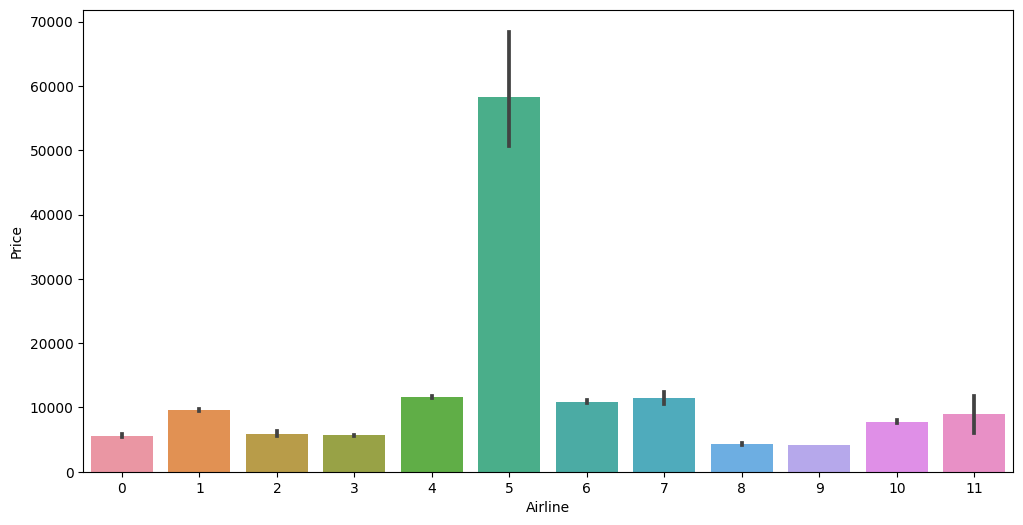

In [62]:
#Barplot between Airline vs price
sns.barplot(x='Airline',y='Price',data=final_df)

# Creating the test and train data sets

In [63]:
test_df=final_df[final_df['Price'].isnull()]
train_df=final_df[~final_df['Price'].isnull()]
train_df.isnull().sum()


Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
Day                0
Month              0
Year               0
Dep_hour           0
Dep_min            0
Arrival_hour       0
Arrival_min        0
Duration_IN_MIN    0
dtype: int64

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_IN_MIN
0,3,0,5,0.0,8,3897.0,24,3,2019,22,20,1,10,170.0
1,1,3,0,2.0,8,7662.0,1,5,2019,5,50,13,15,445.0
2,4,2,1,2.0,8,13882.0,9,6,2019,9,25,4,25,60.0
3,3,3,0,1.0,8,6218.0,12,5,2019,18,5,23,30,325.0
4,3,0,5,1.0,8,13302.0,1,3,2019,16,50,21,35,285.0


In [66]:
X=train_df.drop('Price',axis=1)

In [67]:
Y=train_df.Price

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.97)

In [69]:
X_train.shape

(10360, 13)

In [70]:
X_test.shape

(321, 13)

In [71]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
cross_val_score(LinearRegression(),X_train,y_train,cv=5)

array([0.42879477, 0.39756333, 0.4383556 , 0.4117283 , 0.46033932])

In [74]:
cross_val_score(LogisticRegression(),X_train,y_train)

D:\Anaconda\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
D:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

array([0.02944015, 0.0246139 , 0.0284749 , 0.02750965, 0.03330116])

In [75]:
cross_val_score(RandomForestRegressor(),X_train,y_train)

array([0.87868246, 0.84478202, 0.90836308, 0.90112592, 0.91780142])

In [76]:
cross_val_score(DecisionTreeRegressor(),X_train,y_train)

array([0.77474278, 0.77492053, 0.82919369, 0.84789614, 0.85284493])

In [77]:
cross_val_score(SVR(),X_train,y_train)

array([-0.02479521, -0.02447423, -0.02448042, -0.02020437, -0.02201931])

## RandomForestRegression has the higest score

In [78]:
model=RandomForestRegressor()

In [79]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [80]:
model.score(X_train,y_train)

0.9819556030533398

In [81]:
model.score(X_test,y_test)

0.9145156727233603

In [82]:
model.predict(X_test)[:10]

array([ 7229.        , 10721.75      ,  8864.53666667,  4472.14      ,
       14086.59      ,  9008.53      , 15212.375     , 14206.05      ,
       14003.9725    ,  8268.62533333])

In [83]:
y_test[:10]

C:\Users\rames\AppData\Local\Temp\ipykernel_21236\2588316582.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:10]


6706     7229.0
6249    10844.0
8815     9450.0
7997     4544.0
6821    13731.0
409      8266.0
2311    15129.0
3614    17732.0
1099    13227.0
6341     7564.0
Name: Price, dtype: float64

In [84]:
test_df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_IN_MIN
0,4,2,1,1.0,8,NaN,6,6,2019,17,30,4,25,115.0
1,3,3,0,1.0,8,NaN,12,5,2019,6,20,10,20,240.0
2,4,2,1,1.0,5,NaN,21,5,2019,19,15,19,0,165.0
3,6,2,1,1.0,8,NaN,21,5,2019,8,0,21,0,60.0
4,0,0,2,0.0,8,NaN,24,6,2019,23,55,2,45,170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1.0,8,NaN,6,6,2019,20,30,20,25,175.0
2667,3,3,0,0.0,8,NaN,27,3,2019,14,20,16,55,155.0
2668,4,2,1,1.0,8,NaN,6,3,2019,21,50,4,25,395.0
2669,1,2,1,1.0,8,NaN,6,3,2019,4,0,19,15,75.0


In [86]:
test_df.drop('Price',axis=1,inplace=True)

C:\Users\rames\AppData\Local\Temp\ipykernel_21236\1543327150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop('Price',axis=1,inplace=True)


In [87]:
test_df

,Airline,Source,Destination,Total_Stops,Additional_Info,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_IN_MIN
0,4,2,1,1.0,8,6,6,2019,17,30,4,25,115.0
1,3,3,0,1.0,8,12,5,2019,6,20,10,20,240.0
2,4,2,1,1.0,5,21,5,2019,19,15,19,0,165.0
3,6,2,1,1.0,8,21,5,2019,8,0,21,0,60.0
4,0,0,2,0.0,8,24,6,2019,23,55,2,45,170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1.0,8,6,6,2019,20,30,20,25,175.0
2667,3,3,0,0.0,8,27,3,2019,14,20,16,55,155.0
2668,4,2,1,1.0,8,6,3,2019,21,50,4,25,395.0
2669,1,2,1,1.0,8,6,3,2019,4,0,19,15,75.0


In [88]:
test_df.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Day                0
Month              0
Year               0
Dep_hour           0
Dep_min            0
Arrival_hour       0
Arrival_min        0
Duration_IN_MIN    0
dtype: int64

In [90]:
model.predict(test_df)[:10]

array([14714.        ,  4225.5       , 12898.        , 10262.38192857,
        3785.52      , 10271.45      , 12316.09      ,  5051.82      ,
        4541.93      , 14764.2       ])